In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
plt.style.use('seaborn')

In [3]:
data = pd.read_csv("netflix_titles.csv")

In [4]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
data.shape

(8807, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
data.isnull().sum()/len(data)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [9]:
new_data = data.drop('director',axis=1)

In [10]:
new_data.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
new_data.listed_in

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

In [12]:
new_data.listed_in = new_data.listed_in.apply(lambda x: x.split(','))

In [13]:
new_data.listed_in

0                                         [Documentaries]
1       [International TV Shows,  TV Dramas,  TV Myste...
2       [Crime TV Shows,  International TV Shows,  TV ...
3                               [Docuseries,  Reality TV]
4       [International TV Shows,  Romantic TV Shows,  ...
                              ...                        
8802                   [Cult Movies,  Dramas,  Thrillers]
8803           [Kids' TV,  Korean TV Shows,  TV Comedies]
8804                           [Comedies,  Horror Movies]
8805                [Children & Family Movies,  Comedies]
8806    [Dramas,  International Movies,  Music & Music...
Name: listed_in, Length: 8807, dtype: object

In [14]:
genre_list = []
for i in new_data.listed_in.values:
    for j in i:
        if j not in genre_list:
            genre_list.append(j)
            
genre_list = [i.strip() for i in genre_list]

In [15]:
map_genre_dict = {i:np.zeros(len(new_data)) for i in genre_list}

In [16]:
df = pd.DataFrame(map_genre_dict)

In [17]:
for idx, genre_list in enumerate(new_data.listed_in.values):
    for genre in genre_list:
        genre = genre.strip()
        df[genre][idx] = 1

In [18]:
df

,Documentaries,International TV Shows,TV Dramas,TV Mysteries,Crime TV Shows,TV Action & Adventure,Docuseries,Reality TV,Romantic TV Shows,TV Comedies,...,Science & Nature TV,Teen TV Shows,Cult Movies,TV Shows,Faith & Spirituality,LGBTQ Movies,Stand-Up Comedy,Movies,Stand-Up Comedy & Talk Shows,Classic & Cult TV
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df.iloc[-1, :]

Documentaries                   0.0
International TV Shows          0.0
TV Dramas                       0.0
TV Mysteries                    0.0
Crime TV Shows                  0.0
TV Action & Adventure           0.0
Docuseries                      0.0
Reality TV                      0.0
Romantic TV Shows               0.0
TV Comedies                     0.0
TV Horror                       0.0
Children & Family Movies        0.0
Dramas                          1.0
Independent Movies              0.0
International Movies            1.0
British TV Shows                0.0
Comedies                        0.0
Spanish-Language TV Shows       0.0
Thrillers                       0.0
Romantic Movies                 0.0
Music & Musicals                1.0
Horror Movies                   0.0
Sci-Fi & Fantasy                0.0
TV Thrillers                    0.0
Kids' TV                        0.0
Action & Adventure              0.0
TV Sci-Fi & Fantasy             0.0
Classic Movies              

In [20]:
new_data.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [21]:
new_data.drop('listed_in',axis=1,inplace=True)

In [22]:
# concatenation

new_data = pd.concat( [new_data, df], axis = 1 )

In [23]:
new_data.isnull().sum()

show_id                           0
type                              0
title                             0
cast                            825
country                         831
date_added                       10
release_year                      0
rating                            4
duration                          3
description                       0
Documentaries                     0
International TV Shows            0
TV Dramas                         0
TV Mysteries                      0
Crime TV Shows                    0
TV Action & Adventure             0
Docuseries                        0
Reality TV                        0
Romantic TV Shows                 0
TV Comedies                       0
TV Horror                         0
Children & Family Movies          0
Dramas                            0
Independent Movies                0
International Movies              0
British TV Shows                  0
Comedies                          0
Spanish-Language TV Shows   

# Problem Statement 1
> Which genre is the most popular?

<BarContainer object of 20 artists>

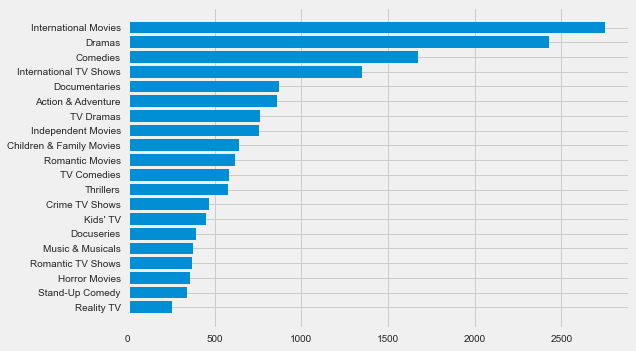

In [49]:
genres_count = df.sum(axis=0).sort_values(ascending=False)[:20].sort_values()
plt.barh(genres_count.index, genres_count.values)

# PROBLEM 2
> Common types according to the genre

In [51]:
data['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [75]:
new_data.loc[new_data.type == 'Movies', 'Docuseries'].sum()

0.0

<AxesSubplot:>

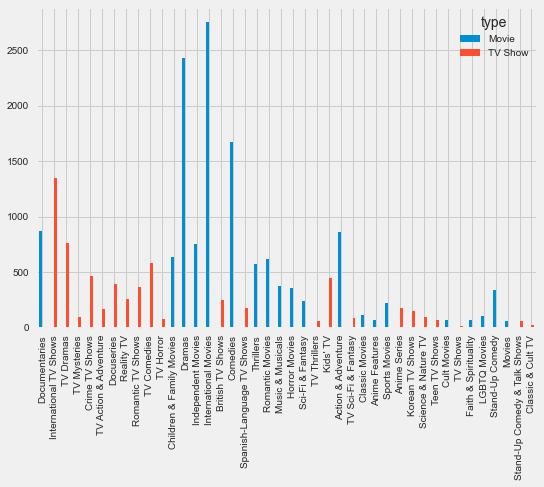

In [107]:
type_grouped = new_data.groupby('type').sum()
type_grouped.drop('release_year',axis=1,inplace=True)
type_grouped = type_grouped.T
type_grouped.plot(kind='bar')

In [25]:
df.to_csv('Genres_one_hot_encoded')

In [26]:
country_wise = data.country.value_counts().head(10)

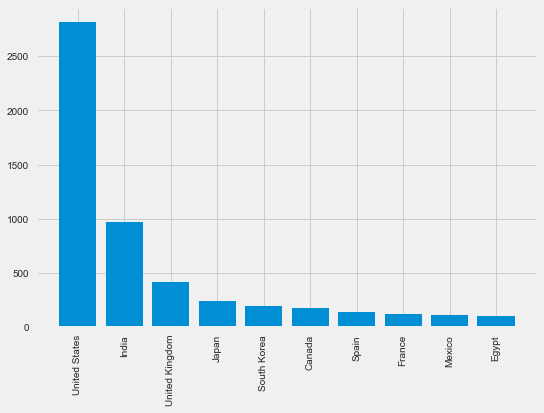

In [27]:
plt.style.use('fivethirtyeight')
plt.bar(country_wise.index,country_wise.values)
plt.xticks(rotation=90)
plt.show()

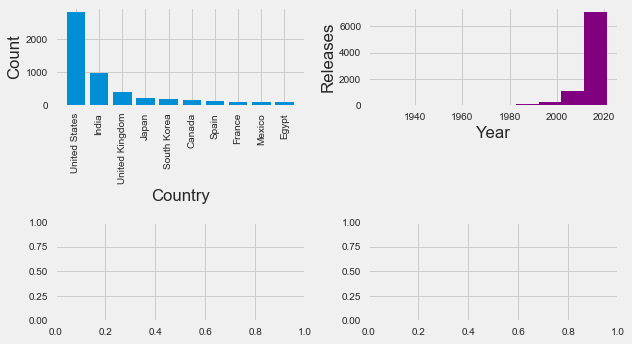

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(9,5))

ax[0,0].bar(country_wise.index,country_wise.values)
ax[0,0].set_xticklabels(country_wise.index,rotation=90)
ax[0,0].set_xlabel('Country')
ax[0,0].set_ylabel('Count')

ax[0,1].hist(data.release_year, color='purple')
ax[0,1].set_xlabel('Year')
ax[0,1].set_ylabel('Releases')

# ax[2].hist(x)
# ax[2].set_xlabel('random')
# ax[2].set_ylabel('count')

plt.tight_layout()
plt.show()